## Predicting Databel Customer Churn Using Machine Learning Models

### 1. Introduction

In today’s high business competition, customer retention is more importance than ever. The loss of customers, commonly referred to as “Customer Churn”, becomes significant challenges for businesses. In this way, machine learning becomes an invaluable tool with the ability to process large amounts of data and identify complex patterns. Machine learning models can predict potential churners with a level of accuracy. 

### 2. Definition of "Churn"

Churn Rate, also known as the rate of attrition or customer churn, is the rate at which customer stop doing business with an entity. 

Churn Analysis is the process of evaluating and understanding the reasons and patterns behind customer choosing to end their relationship with a company or service over a specific period. Churn analysis is including:

•	Descriptive analytics: It is used to understand the current churn rate and profile of churned customers.

•	Predictive analytics: It is used to apply machine learning models to predict potential churn based on customer behavior and characteristics.

•	Prescriptive analytics: It is used to recommend specific actions to prevent or reduce churn.


### 3. Objective

The objective of conducting customer churn prediction is to proactively identify customers who are most likely to discontinue using company’s products or services in the near future, enabling businesses to implement targeted retention strategies. 

### 4. Setting Up the Environment

In [81]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score

In [2]:
# load the data
data = pd.read_csv("Databel - Data.csv")

### 5. Data Exploration (Exploratory Data Analysis or EDA)

#### 5.1 Overview of Dataset

In [3]:
data.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [5]:
data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


#### 5.2 Duplicate Rows

In [6]:
# check duplicate rows
data.duplicated().sum()

0

#### 5.3 Missing Values

In [7]:
# check missing values
data.isna().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [8]:
# Fill in missing values with 'Not Provided'
data.fillna({'Churn Category' : 'Not Provided'}, inplace=True)

#### 5.4 Remove Redundant Variables from the Dataset

In [9]:
# Churn Reason is a textual or categorical variable, column with multiple uniques reasons which can increase model complexity.
data = data.drop(columns = ['Customer ID', 'Phone Number', 'Churn Reason'])

In [10]:
data.shape

(6687, 26)

In [11]:
data.columns

Index(['Churn Label', 'Account Length (in months)', 'Local Calls',
       'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category'],
      dtype='object')

Observation:
- The original dataset consists of 6687 records and 29 features with 16 columns are categorical variables and 13 columns are numeric variables.
- No duplicate rows (or observations) in the dataset.
- There are two columns (Churn Category and Churn Reason) containing 4918 missing values.
- Remove redundant columns (Customer ID, Phone Number, Churn Reason) so the dimension of current dataset is 6687x26.

#### 5.5 Univariate Analysis (Descriptive Statistics)

Univariate analysis is where the data being analyzed contains only one variable. Since it's a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

##### 5.5.1 Central Tendency (Mean, Median, Mode), Dispersion (Range, Standard Deviation, Interquartile)

In [12]:
data.describe()

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


##### 5.5.2 Distribution of Numerical Variables

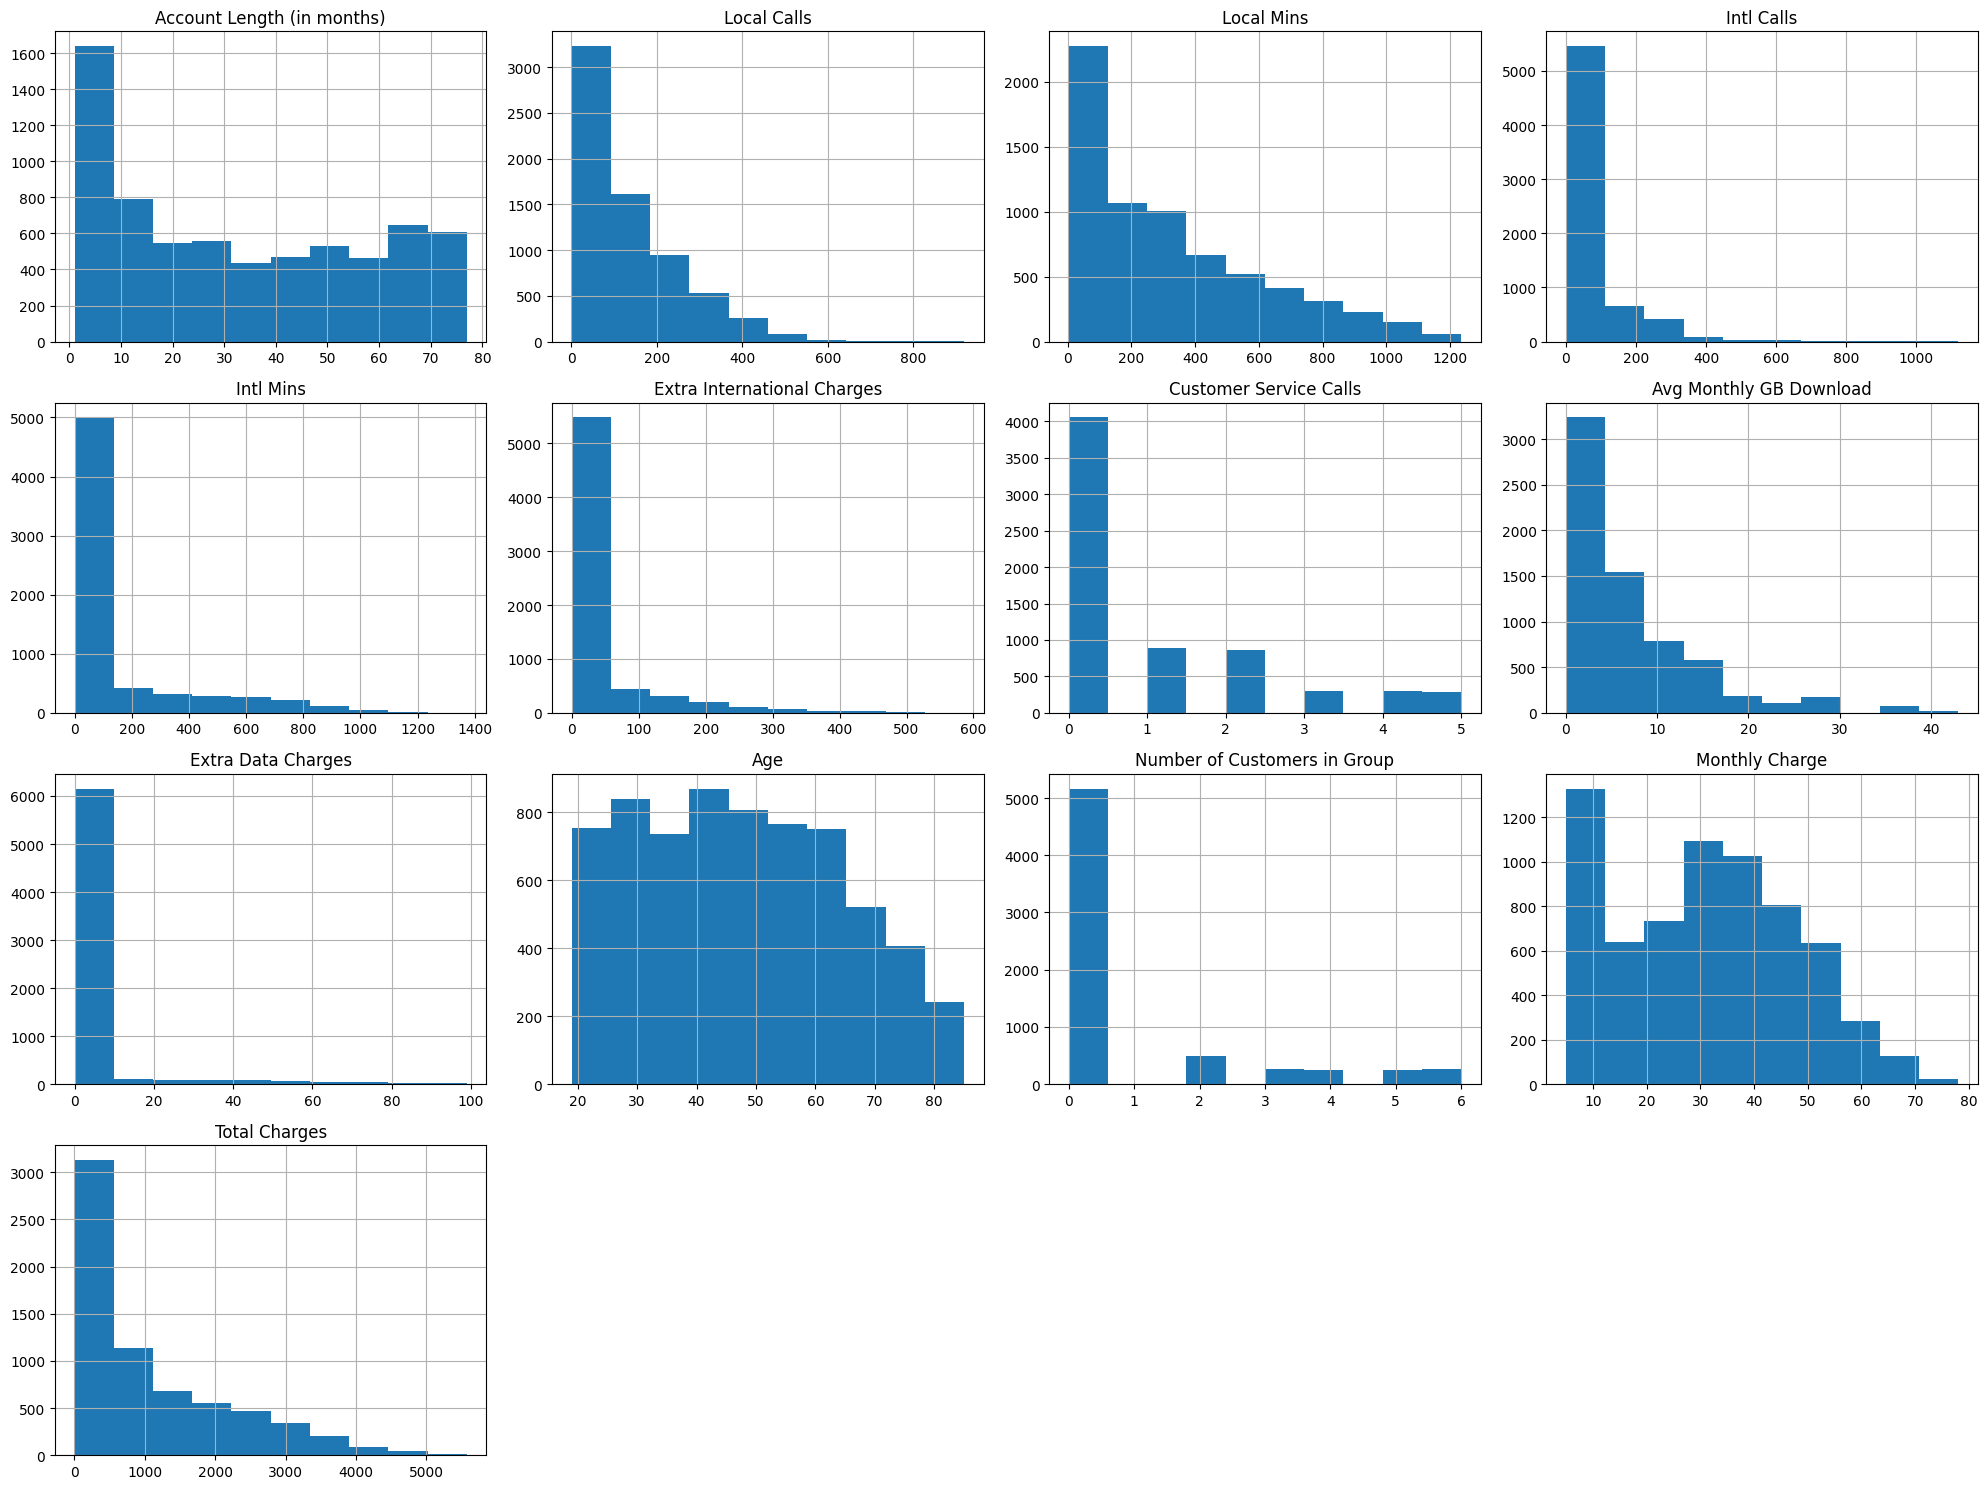

In [13]:
data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

##### 5.5.3 Distribution of Categorical Variables

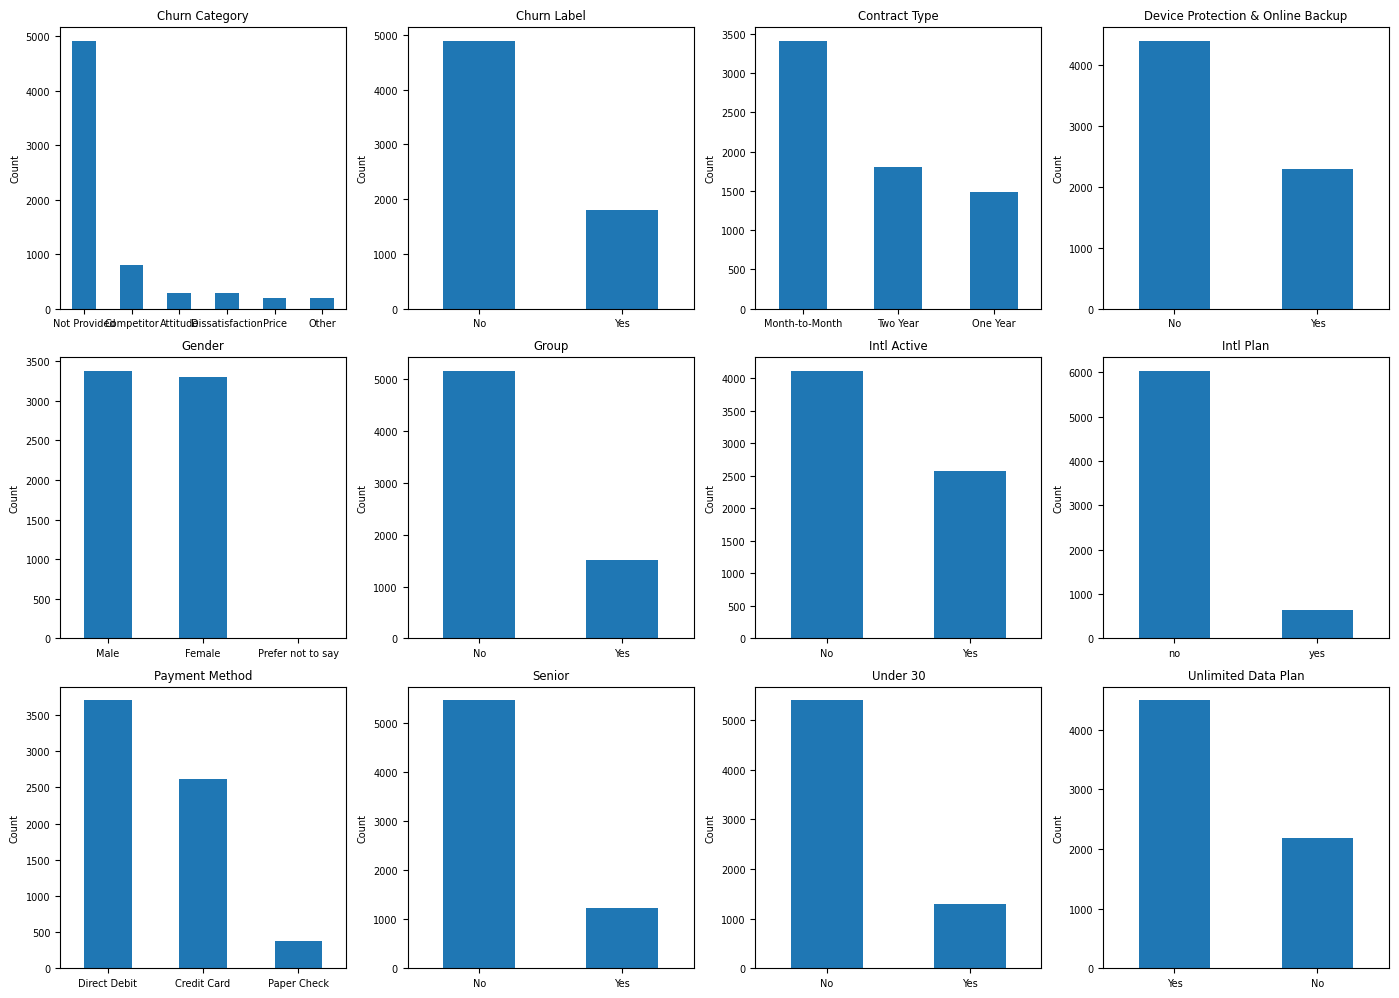

In [15]:
object_columns = data.select_dtypes(include=['object']).columns.difference(['State'])

# Calculate the number of rows and columns for subplots
num_rows = (len(object_columns) + 4 - 1) // 4
num_cols = 4

plt.rc('font', size=7)
plt.figure(figsize=(14, 10))

for i, col in enumerate(object_columns):
    plt.subplot(num_rows, num_cols, i + 1)  
    data[col].value_counts().plot(kind='bar', title=col)
    plt.xlabel('')  # Remove x-axis label for better readability
    plt.ylabel('Count')
    plt.xticks(rotation=360)  
    plt.title(col)  

plt.tight_layout()
plt.show()

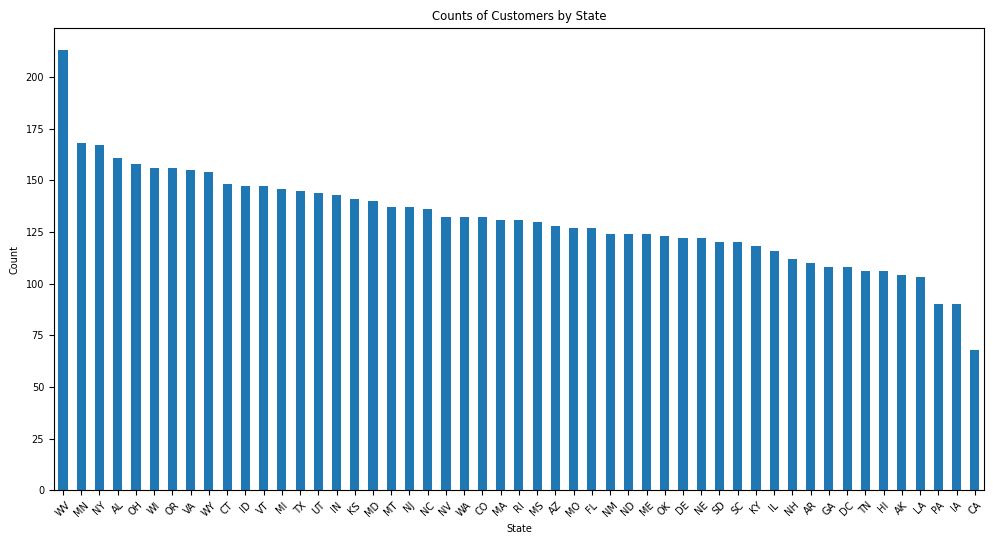

In [16]:
state_counts = data['State'].value_counts()

plt.rc('font', size=7)
plt.figure(figsize=(12, 6))

state_counts.plot(kind='bar')
plt.title('Counts of Customers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

##### 5.5.4 Outlier Detection

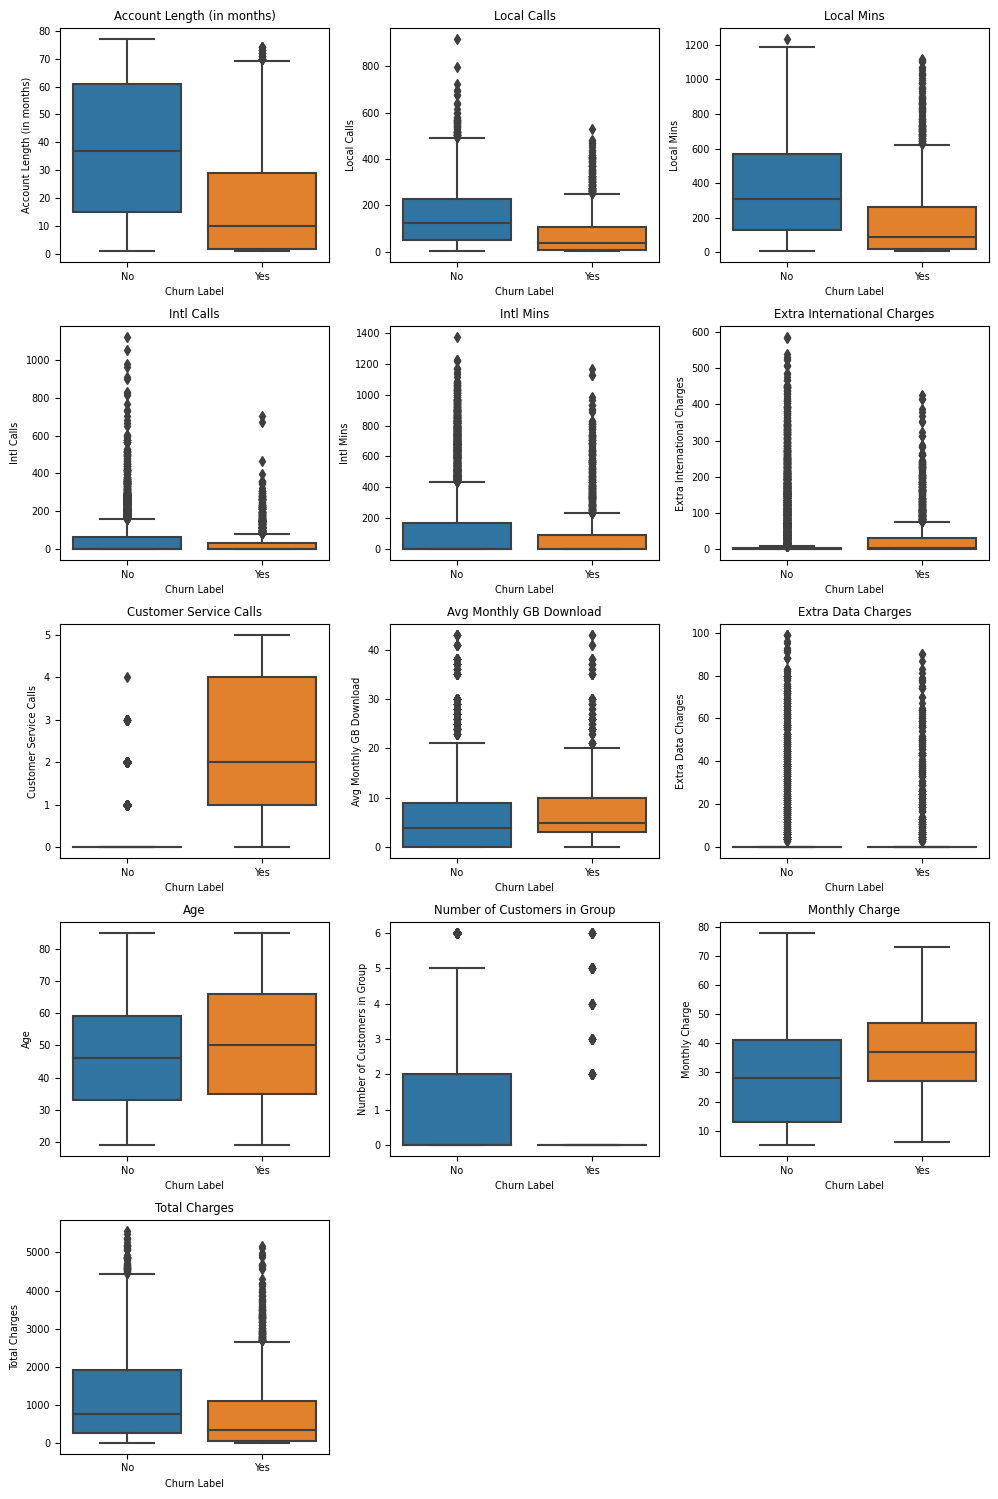

In [17]:
numerical_features = []
categorical_features = []

for i in data.columns:
    if (data[i].dtype == "object"):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

plt.figure(figsize=(10,15))

for i, var in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x = 'Churn Label', y = data[var], data = data)
    plt.tight_layout()
    plt.title(var)

plt.show()

In [18]:
outlier_percentages = {}

for var in numerical_features:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100

    outlier_percentages[var] = percentage

# Sort the dictionary by percentage in descending order
outlier_percentages = {k: v for k, v in sorted(outlier_percentages.items(), key=lambda item: item[1], reverse=True)}

for var, percentage in outlier_percentages.items():
    print(f"{var}: {percentage:.2f}%")


Number of Customers in Group: 22.75%
Extra International Charges: 20.43%
Intl Calls: 16.23%
Intl Mins: 16.09%
Extra Data Charges: 10.29%
Avg Monthly GB Download: 5.46%
Local Calls: 1.85%
Total Charges: 1.84%
Local Mins: 0.57%
Account Length (in months): 0.00%
Customer Service Calls: 0.00%
Age: 0.00%
Monthly Charge: 0.00%


Observation: 

The highest percentage of outliers (see Table 2) are in “Number of Customers in Group”, “Extra International Charges”, “Intl Calls”, and “Intl Mins”, all with percentages exceeding 15% considering high percentage of outliers that outright removal can lead to a substantial loss of data. For churn prediction, understanding the behavior of outliers can be crucial. Sometimes, outliers might represent high-value customers or those with specific needs. Instead of deleting the outliers, considering applying scaling and using algorithms that are less sensitive to outliers might be the better option for this project.

#### 5.6 Bivariate Analysis (Correlation Analysis)

Bivariate analysis is used to analyze two variables to determine the relationship between them. 

In [19]:
numerical_features

['Account Length (in months)',
 'Local Calls',
 'Local Mins',
 'Intl Calls',
 'Intl Mins',
 'Extra International Charges',
 'Customer Service Calls',
 'Avg Monthly GB Download',
 'Extra Data Charges',
 'Age',
 'Number of Customers in Group',
 'Monthly Charge',
 'Total Charges']

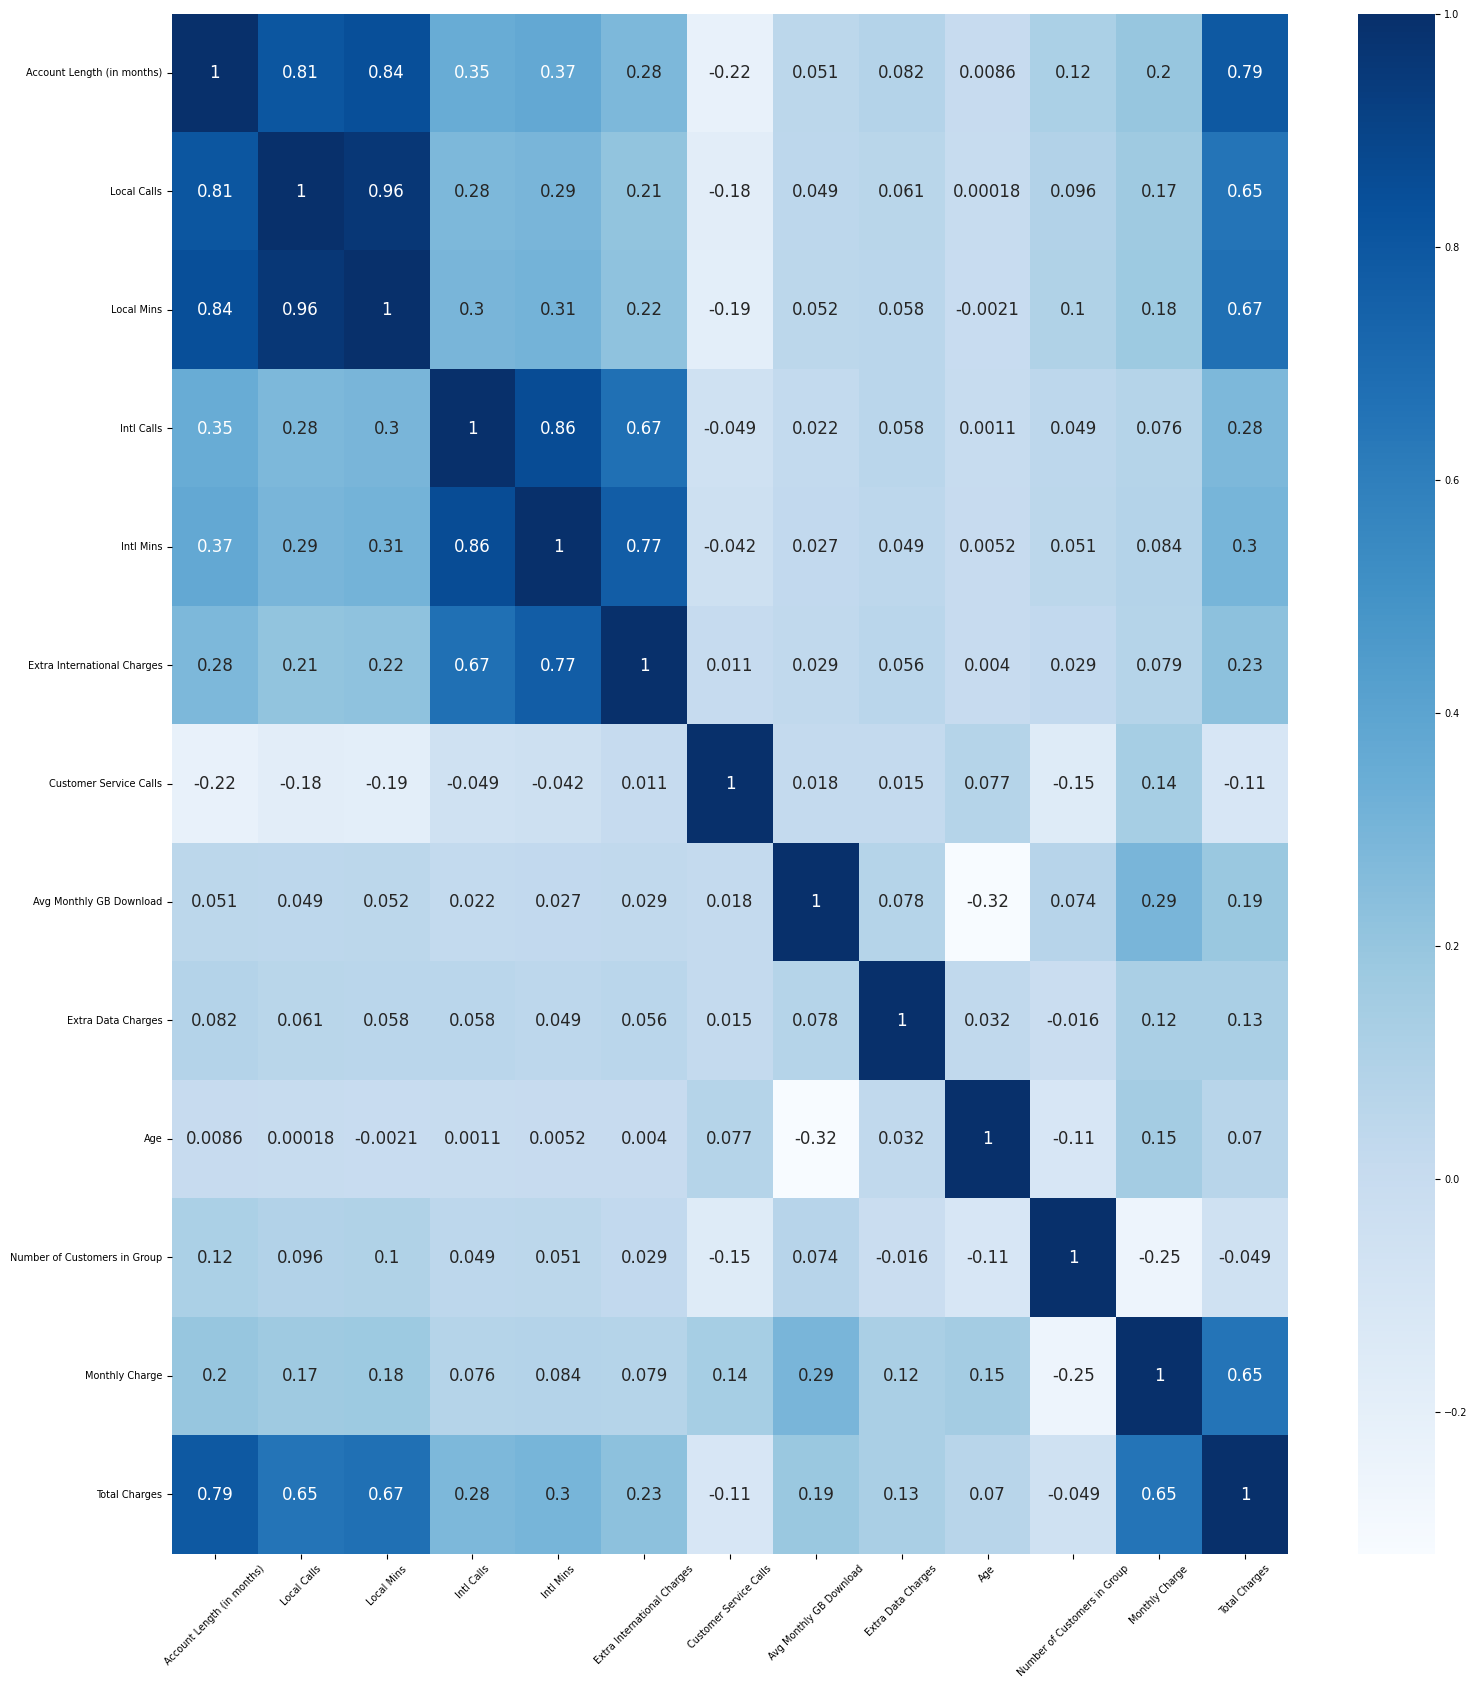

In [20]:
numeric_features = data[[
'Account Length (in months)',
 'Local Calls',
 'Local Mins',
 'Intl Calls',
 'Intl Mins',
 'Extra International Charges',
 'Customer Service Calls',
 'Avg Monthly GB Download',
 'Extra Data Charges',
 'Age',
 'Number of Customers in Group',
 'Monthly Charge',
 'Total Charges']]

corr_matrix_numeric = numeric_features.corr()

fig, ax = plt.subplots(figsize=(18, 20))
sns.heatmap(corr_matrix_numeric,
            annot=True,
            annot_kws={'fontsize': 12},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
plt.show()

Observation:

High correlation coefficient between features highlighted as follows:
- Local Calls and Local Mins (0.96).
- Group and Number of Customers in Group (0.90).
- Intl Calls and Intl Mins (0.85).
- Local Mins and Account Length (0.84).
- Local Calls and Account Length (0.81).
- Account Length and Total Charges (0.78).
- Extra Intl Charges and Intl Mins (0.77).

High correlation values and one from each pair would be considered for removal.


### 6. Data Preprocessing

#### 6.1 Encoding Categorical Variables

In [21]:
categorical_features

['Churn Label',
 'Intl Active',
 'Intl Plan',
 'Unlimited Data Plan',
 'State',
 'Gender',
 'Under 30',
 'Senior',
 'Group',
 'Device Protection & Online Backup',
 'Contract Type',
 'Payment Method',
 'Churn Category']

In [22]:
le = LabelEncoder()

categorical_cols = data[[
 'Churn Label',
 'Intl Active',
 'Intl Plan',
 'Unlimited Data Plan',
 'State',
 'Gender',
 'Under 30',
 'Senior',
 'Group',
 'Device Protection & Online Backup',
 'Contract Type',
 'Payment Method',
 'Churn Category']]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [23]:
# Check the encoding
data.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category
0,0,1,3,8.0,0.0,0.0,0,0,0.0,0,...,0,0,0,0,0,0,1,10,10,3
1,0,33,179,431.3,0.0,0.0,0,0,0.0,0,...,0,0,0,0,1,1,2,21,703,3
2,0,44,82,217.6,0.0,0.0,0,1,0.0,0,...,0,0,0,0,1,1,1,23,1014,3
3,0,10,47,111.6,60.0,71.0,1,1,0.0,0,...,0,0,0,0,0,0,2,17,177,3
4,0,62,184,621.2,310.0,694.4,1,1,0.0,0,...,0,0,0,0,0,1,1,28,1720,3


#### 6.2 Feature Scaling (Standardization)

In [24]:
scaler = StandardScaler()
numerical_features = ['Account Length (in months)', 'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 
                      'Extra International Charges', 'Customer Service Calls', 'Avg Monthly GB Download', 
                      'Extra Data Charges', 'Age', 'Number of Customers in Group', 'Monthly Charge', 'Total Charges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [25]:
# Check mean and standard deviation values after standardization if mean is close to zero and standard deviation close to zero 1
means = data[numerical_features].mean()
std_devs = data[numerical_features].std()

summary_stats = pd.DataFrame({'Mean': means, 'Standard Deviation': std_devs})
print(summary_stats)


                                      Mean  Standard Deviation
Account Length (in months)    0.000000e+00            1.000075
Local Calls                   1.700117e-17            1.000075
Local Mins                   -2.890199e-16            1.000075
Intl Calls                   -1.275088e-17            1.000075
Intl Mins                     6.375440e-17            1.000075
Extra International Charges   8.075557e-17            1.000075
Customer Service Calls        3.400234e-17            1.000075
Avg Monthly GB Download       1.700117e-17            1.000075
Extra Data Charges           -2.550176e-17            1.000075
Age                          -7.544270e-17            1.000075
Number of Customers in Group  1.360094e-16            1.000075
Monthly Charge               -8.925615e-17            1.000075
Total Charges                -1.020070e-16            1.000075


#### 6.3 Feature Selection

Feature Importance using Random Forest

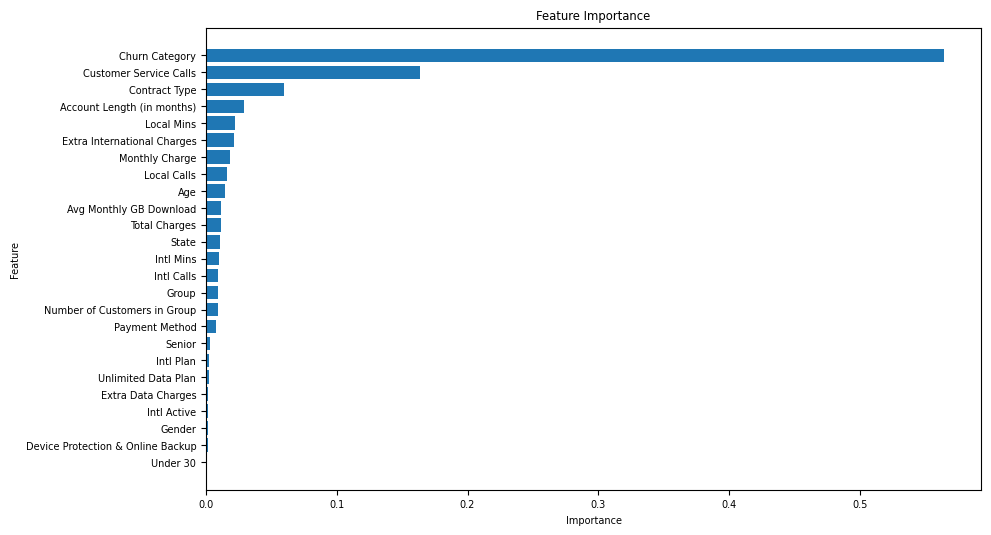

In [28]:
# Churn Label is the target variable
X_fi = data.drop('Churn Label', axis=1)  
y_fi = data['Churn Label']

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_fi, y_fi)

importances = clf.feature_importances_

feature_importances = pd.DataFrame({'feature': X_fi.columns, 'importance': importances})

# Sort by importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

Observation: 

Correlation with target variable (Churn Label): Most of the features have low to moderate correlation with Churn Label, but there are a few with significant correlations, which are particularly important as they have a trong linear relationship with target variable: Customer Service Calls (0.64).

### 7. Independent and Dependent (Target) Variables

Based on the correlation and feature importance of the features, the following features should be removed from model training: Churn Category, Local Calls, Number of Customers in Group, Intl Mins.

In [29]:
# Drop Churn Reason is a leaky feature since it shows high correlation with Churn label and feature importance that provides information about the target variable before the event has actually taken place.
X = data.drop(columns=['Churn Label', 'Churn Category', 'Local Calls', 'Number of Customers in Group', 'Intl Mins'])
y = data['Churn Label']

### 8. Imbalanced Data

#### 8.1 Imbalanced Data

In [31]:
churn_count = data['Churn Label'].value_counts()

churn_count_perentage = 100*data['Churn Label'].value_counts()/len(data['Churn Label'])

print(churn_count_perentage)

Churn Label
0    73.141917
1    26.858083
Name: count, dtype: float64


Observation: The dataset is highly imbalanced with the ratio of 73:27. 

- 73% belongs to "0" class (cutomer who did not churn).
- 27% belongs to "1" class (customer who did churn).

#### 8.2 Resampling Technique

Since the datset is highly imbalanced and most of machine learning algorithms work best when the number of samples in each class are about equal. If one class heavily outnumbers the other, the algorithms can become biased towards the majority class, which means that it might classify input as the majority class as achieving a high acuracy, but failing identifying the minority class. This project applies SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

In [32]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [33]:
# Check the distribution after applying SMOTE
y_resampled.value_counts()

Churn Label
0    4891
1    4891
Name: count, dtype: int64

### 9. Data Splitting (Training and Testing Sets)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [36]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

### 10. Model Selection, Training, and Evaluation

#### 10.1 Model Selection

-	Logistic Regression: It is used for modeling the probability of a binary outcome based on one or more predictive variables. For churn prediction, it would model the probability of a customer churn or not.

-	Decision Tree: It breaks down a dataset into smaller subsets, making a decision at every level forming a tree-like model. For churn prediction, the tree would split customers based on the features.

-	Random Forest: It is an ensemble method that builds multiple decision trees or a forest of decision trees. Each tree is trained on a random subset of the data and makes its own predictions. The Random Forest aggregates these predictions to produce a final result, which makes it more robust and often has higher accuracy than a single decision tree.

-	Support Vector Machine (SVM): It tries to find a hyperplane that best divides a dataset into classes (churning or non-churning).

-	eXtreme Gradient Boosting (XGBoost): It is an ensemble method and implementation of gradient boosting trees algorithm, but instead of fitting multiple trees in parallel like Random Forest, it builds one tree at a time, where each tree corrects the errors of the previous one.


#### 10.2 Training the Model

Each of the selected models is trained using a training dataset allowing the models to learn the patterns and relationships.

#### 10.3 Model Evaluation

After training, the models are tested on a separated test set to evaluate their performance. 

##### 10.3.1 Accuarcy

Accuracy provides the overall correctness of the models.

In [55]:
# Logistic regression
lr = LogisticRegression()

# Decision Tree
dt = DecisionTreeClassifier()

# Random forest
rf = RandomForestClassifier()

# SVM
svm = SVC()

# XGBoost
xgboost = xgb.XGBClassifier()

In [56]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVC': svm,
    'XGBoost': xgboost
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {report}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.8671435871231477
Accuracy for Decision Tree: 0.8804292284108329
Accuracy for Random Forest: 0.911599386816556
Accuracy for SVC: 0.8635666836995401
Accuracy for XGBoost: 0.9151762902401636


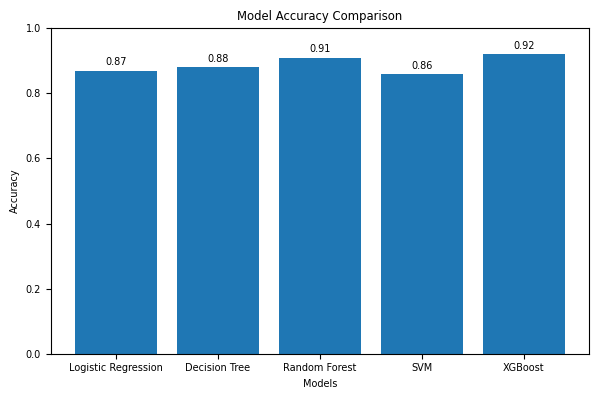

In [57]:
import matplotlib.pyplot as plt

# Sample accuracy results (replace with your actual results)
accuracy_results = {
    'Logistic Regression': 0.87,
    'Decision Tree': 0.88,
    'Random Forest': 0.91,
    'SVM': 0.86,
    'XGBoost': 0.92
}

# Extract model names and accuracy values
model_names = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  

# Display accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

##### 10.3.2 Confusion Matrix

Confusion matrix is used to evaluate the performance of a classification model by presenting the actual and predicted classification. 

In [60]:
y_true = y_test  # True labels

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgboost
}

# Initialize dictionaries to store results
confusion_matrices = {}
precisions = {}
recalls = {}

# Fit each model, make predictions, and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices[model_name] = cm
    precision = precision_score(y_true, y_pred)
    precisions[model_name] = precision
    recall = recall_score(y_true, y_pred)
    recalls[model_name] = recall

# Display confusion matrices, precision, and recall
for model_name in models.keys():
    df = pd.DataFrame(confusion_matrices[model_name], columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    print(f'Confusion Matrix for {model_name}:\n{df}')
    print(f'Precision for {model_name}: {precisions[model_name]:.2f}')
    print(f'Recall for {model_name}: {recalls[model_name]:.2f}\n')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
          Predicted 0  Predicted 1
Actual 0          848          131
Actual 1          129          849
Precision for Logistic Regression: 0.87
Recall for Logistic Regression: 0.87

Confusion Matrix for Decision Tree:
          Predicted 0  Predicted 1
Actual 0          857          122
Actual 1          109          869
Precision for Decision Tree: 0.88
Recall for Decision Tree: 0.89

Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0          905           74
Actual 1           94          884
Precision for Random Forest: 0.92
Recall for Random Forest: 0.90

Confusion Matrix for SVM:
          Predicted 0  Predicted 1
Actual 0          850          129
Actual 1          138          840
Precision for SVM: 0.87
Recall for SVM: 0.86

Confusion Matrix for XGBoost:
          Predicted 0  Predicted 1
Actual 0          902           77
Actual 1           89          889
Precision for XGBoost: 0.92
Recall for XGBoost: 0

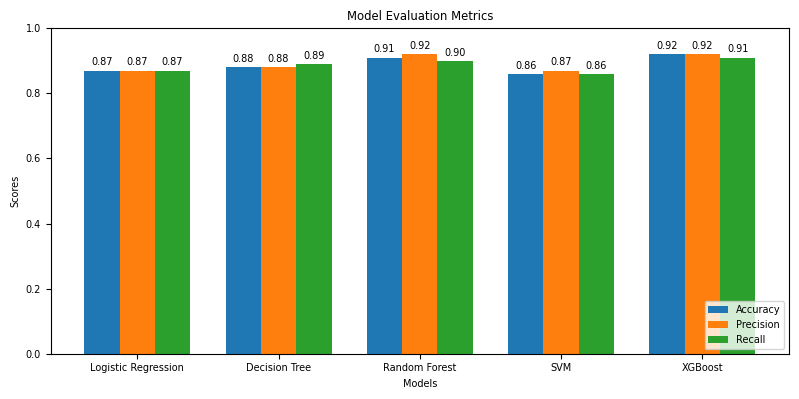

In [64]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
accuracies = [0.87, 0.88, 0.91, 0.86, 0.92]
precisions = [0.87, 0.88, 0.92, 0.87, 0.92]
recalls = [0.87, 0.89, 0.90, 0.86, 0.91]

# Number of models
num_models = len(models)

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.25

# Generate positions for bars on x-axis
index = np.arange(num_models)

# Plot accuracies
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', align='center')

# Plot precisions
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', align='center')

# Plot recalls
bar3 = ax.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', align='center')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend(loc='lower right') 
plt.ylim(0, 1)

# Add numeric values on the bars
for bars in [bar1, bar2, bar3]:
    for bar, value in zip(bars, accuracies if bars == bar1 else (precisions if bars == bar2 else recalls)):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### 10.3.3 ROC Curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


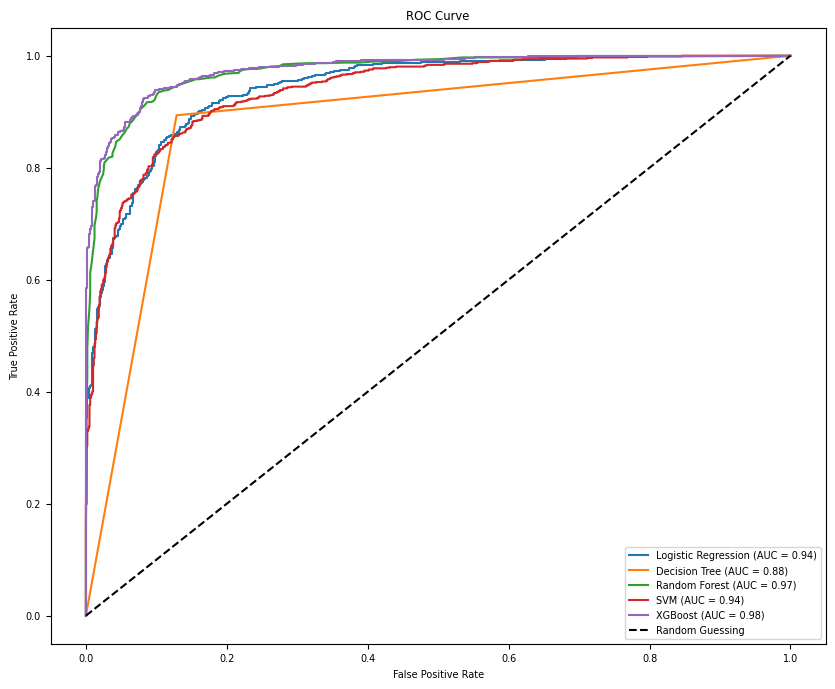

Logistic Regression ROC AUC: 0.94
Decision Tree ROC AUC: 0.88
Random Forest ROC AUC: 0.97
SVM ROC AUC: 0.94
XGBoost ROC AUC: 0.98


In [67]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': SVC(probability=True),
    'XGBoost': xgboost
}

# Initialize an empty dictionary to store ROC AUC scores
roc_auc_scores = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[model_name] = roc_auc
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Print ROC AUC scores
for model_name, roc_auc in roc_auc_scores.items():
    print(f'{model_name} ROC AUC: {roc_auc:.2f}')


### 11. Save and Test the Model

#### 11.1 Save the Model

In [69]:
import pickle

# Save the trained XGBoost model to a file
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgboost, model_file)

#### 11.2 Test the Model using Sample Set

In [68]:
X.columns

Index(['Account Length (in months)', 'Local Mins', 'Intl Calls', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Monthly Charge', 'Total Charges'],
      dtype='object')

Reload the Model and Test with Sample Set

In [70]:
# Load the saved XGBoost model
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_xgboost_model = pickle.load(model_file)

In [78]:
# Sample data matching the model's features in the desired order
sample_data = pd.DataFrame({
    'Account Length (in months)': [9],
    'Local Mins': [88],
    'Intl Calls': [60],
    'Customer Service Calls': [0],
    'Avg Monthly GB Download': [5],
    'Age': [29],
    'Contract Type': ['Month-to-Month'],
    'Payment Method': ['Credit Card'],
    'Monthly Charge': [80.0],
    'Group': [1],  # Assign an appropriate value for 'Group'
    'Intl Plan': ['No'],
    'Device Protection & Online Backup': ['No'],
    'Unlimited Data Plan': ['Yes'],
    'Extra International Charges': [40],
    'Under 30': ['Yes'],
    'Senior': ['No'],
    'State': ['CA'],
    'Intl Active': ['No'],
    'Gender': ['Female'],
    'Extra Data Charges': [0],
    'Total Charges': [1200]
}, columns=['Account Length (in months)', 'Local Mins', 'Intl Calls', 'Intl Active',
            'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
            'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
            'State', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
            'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
            'Monthly Charge', 'Total Charges'])

# Create a copy of the sample data to avoid modifying the original DataFrame
sample_data_encoded = sample_data.copy()

label_encoders = {}

categorical_columns = ['Contract Type', 'Payment Method', 'Intl Plan', 'Device Protection & Online Backup',
                       'Unlimited Data Plan', 'Under 30', 'Senior', 'State', 'Intl Active', 'Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    sample_data_encoded[column] = label_encoders[column].fit_transform(sample_data_encoded[column])

# Predict churn for the sample data
predictions = loaded_xgboost_model.predict(sample_data_encoded)

print("Predicted Churn Label for Sample Data:", predictions[0])


Predicted Churn Label for Sample Data: 1


Observation:

A predicted churn label of "1" indicates that, according to the XGBoost model, the customer is likely to churn based on the provided information. So business can use this prediction as a tool for customer churn retention strategies.

### 12. Conclusion

This project has identified key variables influencing churn, addressed challenges such as imbalanced dataset, and employed a variety of machine learning models to evaluate prediction accuracy. Through the model evaluations, the models have provided both reliability and interpretability, especially XGBoost and Random Forest, which outperformed and more robust in term of accuracy (about 92%) and correctness compared to Logistic Regression, Decision Tree, and Support Vector Machine.